In [313]:
import time


In [314]:
import warnings

import h2o
import matplotlib.pyplot as plt
import pandas as pd
from h2o.automl import H2OAutoML
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

In [315]:
# Carga de datos
df_survey = pd.read_pickle(filepath_or_buffer="data/df_survey.pkl")
y = "covid19"
ignore = ["covid19"]
x = list(set(df_survey.columns) - set(ignore))


In [316]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the numeric and categorical features
numeric_features = [
    "id_bio_age",
    "id_bio_weight",
    "id_bio_height",
    "id_mat_18_plus_household_members",
    "id_mat_total_household_members",
]
categorical_features = list(set(x) - set(numeric_features))

# Define the transformers for numeric and categorical features
numeric_transformer = Pipeline(
    # steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
    steps=[("imputer", KNNImputer(n_neighbors=2)), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
    ]
)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Fit and transform the data
df_survey_imputed = preprocessor.fit_transform(df_survey[x])

df_survey_imputed = pd.DataFrame(
    df_survey_imputed, columns=numeric_features + categorical_features
)

In [317]:
df_survey_imputed

,id_bio_age,id_bio_weight,id_bio_height,id_mat_18_plus_household_members,id_mat_total_household_members,id_bio_bubble_contag,sd_cul_holiday_season,id_beh_risk_personal,id_psy_vaccination_myths,id_beh_physical_act,...,id_bio_disability,sd_cul_religion,sd_edu_scholarity,sd_inc_income_level,id_psy_anxiety_sympt,id_beh_percep_contag,id_bio_death_covid,sd_inc_income_problems,id_bio_masculine,sd_occ_current_job
0,0.687743,1.056029,1.274579,0.074185,-0.412978,1.0,2.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.703823,-0.227145,0.551530,0.074185,-0.412978,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.328336,1.654843,0.551530,-0.630047,-0.412978,0.0,2.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0
3,2.338873,-1.168139,-1.617615,-0.630047,-1.007014,0.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-1.344416,0.628305,1.481164,1.482649,0.775094,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,-0.582356,0.457215,-0.068226,0.074185,0.181058,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0
1999,-1.344416,0.542760,0.344945,0.778417,0.181058,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2000,1.195783,-1.253684,-0.584689,0.074185,-0.412978,1.0,2.0,0.0,0.0,2.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,0.878258,-0.398234,-0.068226,2.186881,1.369129,1.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0


In [318]:
X_train, X_test, y_train, y_test = train_test_split(
    df_survey_imputed,
    df_survey[y],
    test_size=0.2,
    random_state=40,
    stratify=df_survey[y],
)


print("#" * 5 + " Split sample " + "#" * 5)
print("train:%d, test:%d" % (len(y_train.index), len(y_test.index)))
print("#" * 5 + " Distribution Train Sample " + "#" * 5)
print(y_train.value_counts() / len(y_train))
print("#" * 5 + " Distribution Test Sample " + "#" * 5)
print(y_test.value_counts() / len(y_test))

train = pd.concat([y_train, X_train], axis=1)
test = pd.concat([y_test, X_test], axis=1)


##### Split sample #####
train:1602, test:401
##### Distribution Train Sample #####
covid19
False    0.730961
True     0.269039
Name: count, dtype: float64
##### Distribution Test Sample #####
covid19
False    0.730673
True     0.269327
Name: count, dtype: float64


In [319]:
# Inicializar h2o
# h2o.cluster().shutdown()

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,9 hours 23 mins
H2O_cluster_timezone:,America/Costa_Rica
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_maikol_zsq81p
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.189 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [320]:
train.columns

Index(['covid19', 'id_bio_age', 'id_bio_weight', 'id_bio_height',
       'id_mat_18_plus_household_members', 'id_mat_total_household_members',
       'id_bio_bubble_contag', 'sd_cul_holiday_season', 'id_beh_risk_personal',
       'id_psy_vaccination_myths', 'id_beh_physical_act',
       'id_beh_percep_severity', 'id_bio_outside_bubble_contag',
       'id_bio_vaccination_status', 'id_bio_comorbidities',
       'sd_eth_is_costa_rican', 'id_beh_risk_others', 'id_bio_disability',
       'sd_cul_religion', 'sd_edu_scholarity', 'sd_inc_income_level',
       'id_psy_anxiety_sympt', 'id_beh_percep_contag', 'id_bio_death_covid',
       'sd_inc_income_problems', 'id_bio_masculine', 'sd_occ_current_job'],
      dtype='object')

In [321]:
# Convertir a h2o
col_types = {
    "covid19": "enum",
    "id_beh_percep_contag": "enum",
    "id_beh_percep_severity": "enum",
    "id_bio_bubble_contag": "enum",
    "id_bio_outside_bubble_contag": "enum",
    "id_bio_death_covid": "enum",
    "id_beh_risk_personal": "enum",
    "id_beh_risk_others": "enum",
    "id_beh_physical_act": "enum",
    "id_psy_vaccination_myths": "enum",
    "id_bio_vaccination_status": "enum",
    "id_psy_anxiety_sympt": "enum",
    "sd_inc_income_problems": "enum",
    "sd_inc_income_level": "enum",
    "sd_cul_holiday_season": "enum",
    "id_bio_masculine": "enum",
    "id_bio_age": "int",
    "id_bio_weight": "int",
    "id_bio_height": "int",
    "sd_edu_scholarity": "enum",
    "sd_occ_current_job": "enum",
    "sd_eth_is_costa_rican": "enum",
    "id_bio_comorbidities": "enum",
    "sd_cul_religion": "enum",
    "id_bio_disability": "enum",
    "id_mat_18_plus_household_members": "int",
    "id_mat_total_household_members": "int",
}

train_h2o = h2o.H2OFrame(train, column_types=col_types)
test_h2o = h2o.H2OFrame(test, column_types=col_types)


Parse progress: |

████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [322]:
train_h2o.types

{'covid19': 'enum',
 'id_bio_age': 'real',
 'id_bio_weight': 'real',
 'id_bio_height': 'real',
 'id_mat_18_plus_household_members': 'real',
 'id_mat_total_household_members': 'real',
 'id_bio_bubble_contag': 'enum',
 'sd_cul_holiday_season': 'enum',
 'id_beh_risk_personal': 'enum',
 'id_psy_vaccination_myths': 'enum',
 'id_beh_physical_act': 'enum',
 'id_beh_percep_severity': 'enum',
 'id_bio_outside_bubble_contag': 'enum',
 'id_bio_vaccination_status': 'enum',
 'id_bio_comorbidities': 'enum',
 'sd_eth_is_costa_rican': 'enum',
 'id_beh_risk_others': 'enum',
 'id_bio_disability': 'enum',
 'sd_cul_religion': 'enum',
 'sd_edu_scholarity': 'enum',
 'sd_inc_income_level': 'enum',
 'id_psy_anxiety_sympt': 'enum',
 'id_beh_percep_contag': 'enum',
 'id_bio_death_covid': 'enum',
 'sd_inc_income_problems': 'enum',
 'id_bio_masculine': 'enum',
 'sd_occ_current_job': 'enum'}

In [323]:
max_models = 500
excluded_algos = ["StackedEnsemble", "DeepLearning"]

# Definir modelo y entrenar
aml = H2OAutoML(
    nfolds=10,
    max_models=max_models,
    max_runtime_secs=3600,
    seed=42,
    stopping_metric="aucpr",
    sort_metric="aucpr",
    balance_classes=False,
    exclude_algos=excluded_algos,
)


In [324]:
aml.train(y=y, training_frame=train_h2o)


AutoML progress: |

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_9_20230928_61022_model_151


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    34                 34                          6979                   4            8            5.76471       10            13            11.7059

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1301195240958551
RMSE: 0.3607208395641359
LogLoss: 0.41329207313586885
Mean Per-Class Error: 0.21291021812914973
AUC: 0.876275260005429
AUCPR: 0.731377698868704
Gini: 0.752550520010858

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4444886544277943
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  1031     140     0.1196   (140.0/1171.0)
True   132      299     0.3063   (132.0/431.0)
Total  1163     439     0.1698   (272.0/1602.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.444489     0.687356  158
max f2                       0.156843     0.789268  293
max f0point5                 0.472636     0.691628  138
max accuracy                 0.472636     0.830212  138
max precision                0.753731     1         0
max recall                   0.0855985    1         379
max specificity              0.753731     1         0
max absolute_mcc             0.444489     0.570877  158
max min_per_class_accuracy   0.238719     0.785653  229
max mean_per_class_accuracy  0.199301     0.797779  253
max tns                      0.753731     1171      0
max fns                      0.753731     430       0
max fps                      0.0588864    1171      399
max tps                      0.0855985    431       379
max tnr                      0.753731     1         0
max fnr                      0.753731     0.99768   0
max fpr                      0.0588864    1         399
max tpr                      0.0855985    1         379

Gains/Lift Table: Avg response rate: 26.90 %, avg score: 26.98 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0106117                   0.69813            3.71694    3.71694            1                0.72203    1                           0.72203             0.0394432       0.0394432                  271.694   271.694            0.0394432
2        0.0205993                   0.666326           3.48463    3.6043             0.9375           0.68269    0.969697                    0.702956            0.0348028       0.0742459                  248.463   260.43             0.073392
3        0.0305868                   0.647757           3.25232    3.48937            0.875            0.654261   0.938776                    0.687056            0.0324826       0.106729                   225.232   248.937            0.104167
4        0.0405743                   0.634463           3.48463    3.4882             0.9375           0.641919   0.938462                    0.675945            0.0348028       0.141531                   248.463   248.82             0.138115
5        0.0505618                   0.624327           3.02001    3.39572            0.8125           0.63

In [325]:
# Performance del modelo

perf = aml.leader.model_performance(test_data=test_h2o)
prevalence = sum(df_survey.covid19) / len(df_survey)
threshold = perf.F1()[0][0]
sensitivity = perf.recall(thresholds=[threshold])[0][1]
specificity = perf.specificity(thresholds=[threshold])[0][1]
F1 = perf.F1(thresholds=[threshold])[0][1]
AUC = perf.auc()
AUC_PR = perf.aucpr()
precision = perf.precision(thresholds=[threshold])[0][1]
accuracy = perf.accuracy(thresholds=[threshold])[0][1]


print("Prevalence", prevalence)
print("Threshold", threshold)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("F1:", F1)
print("AUC:", AUC)
print("AUC_PR:", AUC_PR)
print(perf.confusion_matrix(thresholds=[threshold]))


Prevalence 0.2690963554667998
Threshold 0.41092995155336587
Sensitivity: 0.75
Specificity: 0.8122866894197952
Precision: 0.5955882352941176
Accuracy: 0.7955112219451371
F1: 0.663934426229508
AUC: 0.8175325496144609
AUC_PR: 0.6075106278109308
Confusion Matrix (Act/Pred) @ threshold = 0.41092995155336587
       False    True    Error    Rate
-----  -------  ------  -------  ------------
False  238      55      0.1877   (55.0/293.0)
True   27       81      0.25     (27.0/108.0)
Total  265      136     0.2045   (82.0/401.0)


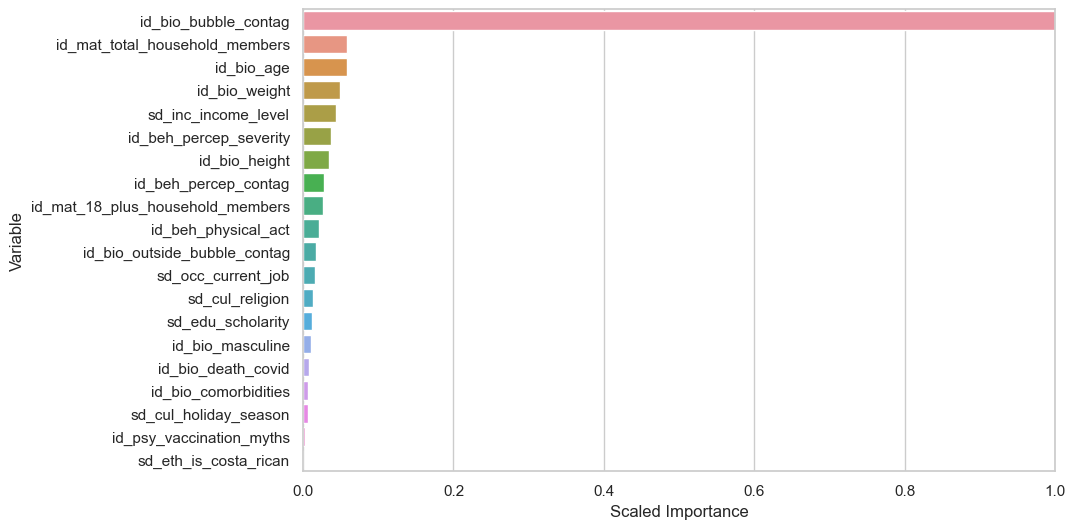

In [367]:
# Get variable importance data
var_imp = aml.leader.varimp(use_pandas=True)

# Filter only the variables with positive scaled_importance value
var_imp = var_imp[var_imp["scaled_importance"] > 0]


h = 6
w = h * 1.618
# Create plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(w, h))  # set the figure size
sns.barplot(x="scaled_importance", y="variable", data=var_imp)

# Set informative labels for the plot
plt.xlabel("Scaled Importance")
plt.ylabel("Variable")

# Set the x-axis limits to adjust the scale
plt.xlim(0, 1)

# Save plot to pdf file
plt.savefig("img/plot_varimp.pdf", bbox_inches="tight")
plt.show()

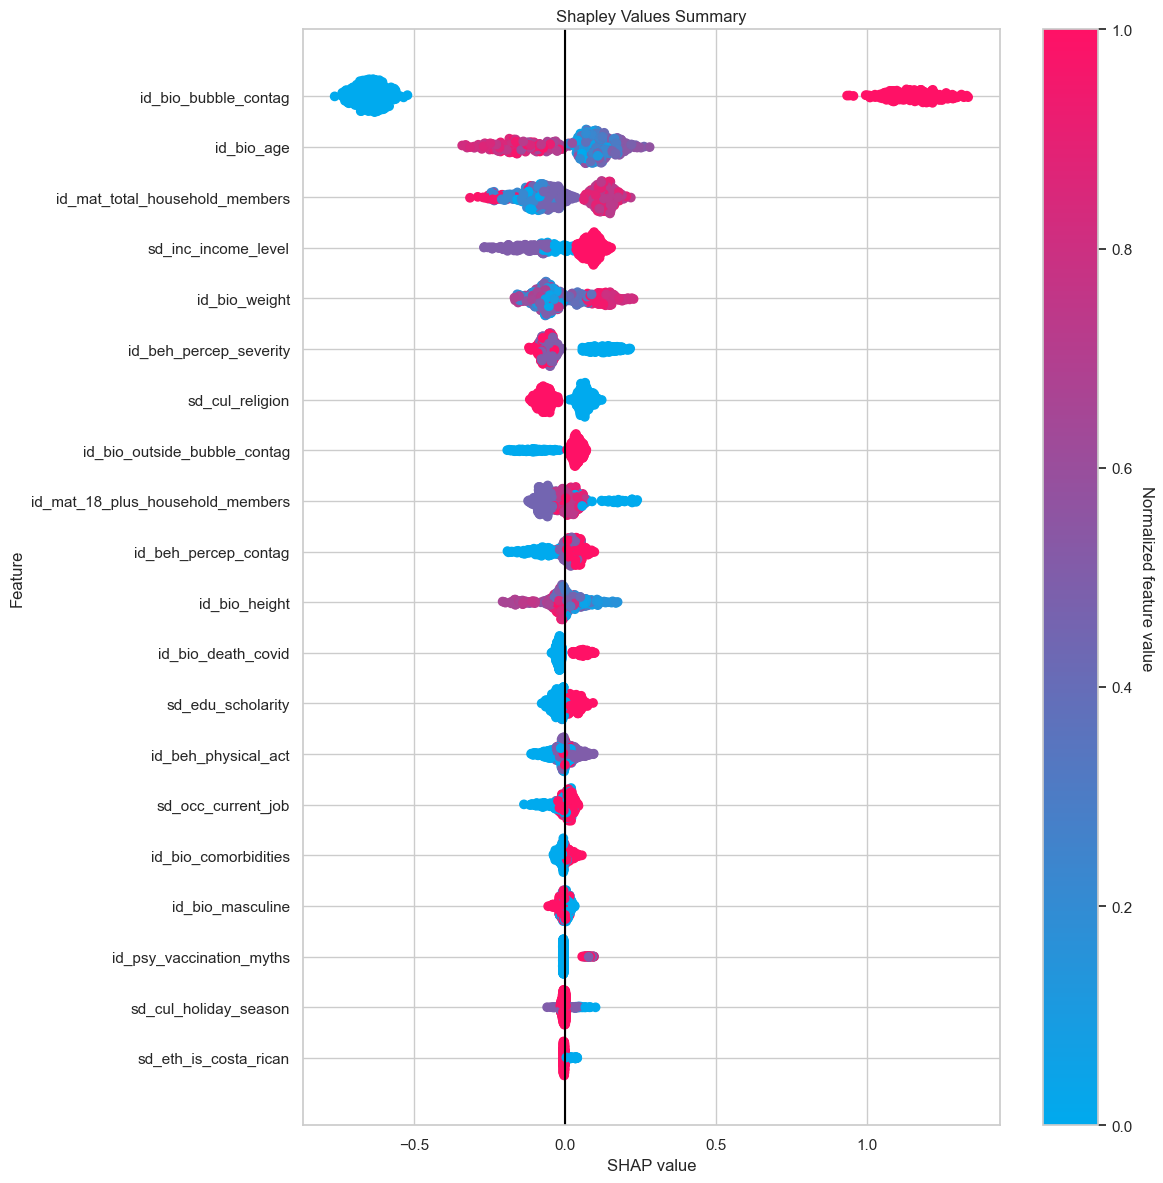

In [381]:
shap_plot = aml.leader.shap_summary_plot(test_h2o)

plt.title("Shapley Values Summary")
plt.savefig("img/plot_shap.pdf", bbox_inches="tight")

In [396]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

auc(fprs, tprs)

0.817532549614461

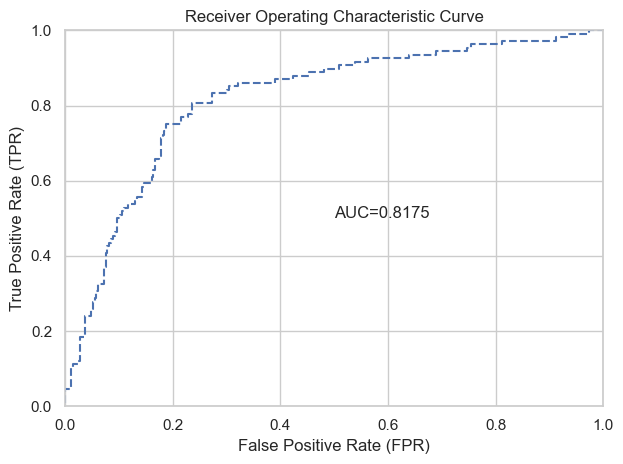

In [407]:
perf.plot(type="roc")
plt.show()


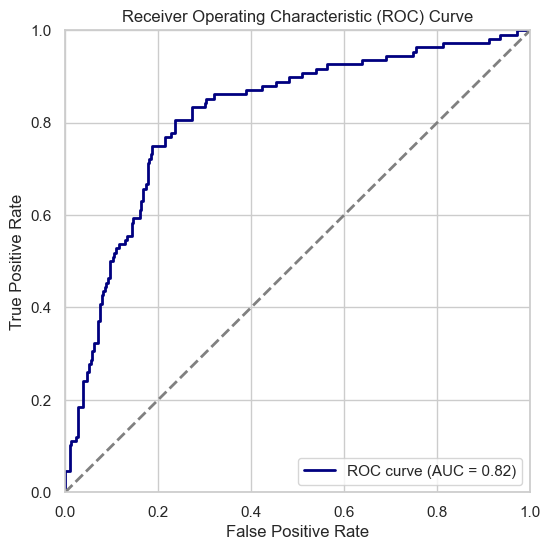

In [405]:
# Plots de performance

# perf.plot(type="roc")

import matplotlib.pyplot as plt

fprs = perf.fprs
tprs = perf.tprs
auc = perf.auc()

h = 6
w = 6
plt.figure(figsize=(w, h))
lw = 2
plt.plot(
    fprs,
    tprs,
    color="navy",
    lw=lw,
    linestyle="-",
    label="ROC curve (AUC = %0.2f)" % auc,
)
plt.plot([0, 1], [0, 1], color="gray", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("img/plot_roc.pdf", bbox_inches="tight")
plt.show()


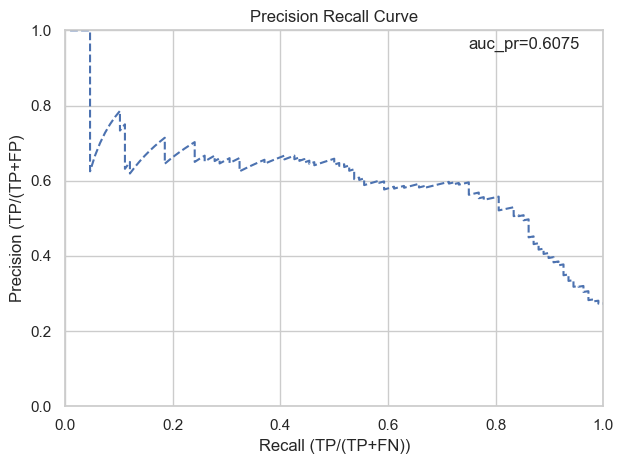

In [422]:
pr_curve = perf.plot(type="pr")


In [ ]:
fprs = perf.recall
tprs = perf.tprs
auc = perf.auc()

h = 6
w = 6
plt.figure(figsize=(w, h))
lw = 2
plt.plot(
    fprs,
    tprs,
    color="navy",
    lw=lw,
    linestyle="-",
    label="ROC curve (AUC = %0.2f)" % auc,
)
plt.plot([0, 1], [0, 1], color="gray", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("img/plot_roc.pdf", bbox_inches="tight")
plt.show()

In [329]:
# Variable importance
aml.leader.varimp(use_pandas=True)


,variable,relative_importance,scaled_importance,percentage
0,id_bio_bubble_contag,381.708984,1.000000,0.688771
1,id_mat_total_household_members,22.269951,0.058343,0.040185
2,id_bio_age,22.125715,0.057965,0.039925
3,id_bio_weight,18.545717,0.048586,0.033465
4,sd_inc_income_level,16.837002,0.044110,0.030381
5,id_beh_percep_severity,14.123138,0.037000,0.025484
6,id_bio_height,12.987672,0.034025,0.023435
7,id_beh_percep_contag,10.781570,0.028246,0.019455
8,id_mat_18_plus_household_members,10.338064,0.027084,0.018654
9,id_beh_physical_act,8.336168,0.021839,0.015042


In [330]:
# Permutation importance
aml.leader.permutation_importance(
    frame=test_h2o, n_repeats=5, metric="PR_AUC", use_pandas=True
)


,Run 1,Run 2,Run 3,Run 4,Run 5
Variable,,,,,
id_bio_bubble_contag,0.244521,0.267575,0.250655,0.268565,0.299380
id_bio_height,0.055458,0.045135,0.037366,0.030599,0.044578
sd_inc_income_level,0.030963,0.016541,0.020707,0.016836,0.035954
id_beh_physical_act,0.029751,0.008793,0.005137,0.012820,0.011813
id_bio_death_covid,0.016157,0.010323,0.017066,0.028920,0.015441
sd_occ_current_job,0.015806,0.012585,0.015642,0.026104,0.021294
id_bio_age,0.011515,0.022053,0.029673,0.011302,0.019581
id_beh_percep_severity,0.011192,0.030332,0.010878,0.012087,0.039976
id_mat_total_household_members,0.008810,0.020928,0.018737,0.017508,0.028065


Cálculo sin burbuja

In [331]:
# Guardar parametros
model_parameters = pd.DataFrame(
    {
        "prevalence": [prevalence],
        "threshold": [threshold],
        "sens_model": sensitivity,
        "spec_model": specificity,
        "people": test_h2o.nrow,
    }
)
print(model_parameters)
model_parameters.to_pickle(path="data/model_parameters.pkl")


   prevalence  threshold  sens_model  spec_model  people
0    0.269096    0.41093        0.75    0.812287     401
